In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 4.8 MB/s eta 0:00:00


In [ ]:
from feature_engine.selection import DropDuplicateFeatures,DropCorrelatedFeatures,DropConstantFeatures,SmartCorrelatedSelection
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SpaceApp/hourwise_dataset.csv")

In [ ]:
df.head()

,Date,Time,Datetime,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,...,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,SN,F10.7obs,F10.7adj,ap_value,Kp_value
0,2023-08-17,00:00:00,2023-08-17 00:00:00,1,7.89,7.21,8.66,-0.52,-3.56,0.57,...,303.7,315.4,16786,12124,19425,146.0,151.9,155.7,9,2.333
1,2023-08-17,01:00:00,2023-08-17 01:00:00,1,7.44,6.78,8.34,-2.78,-3.86,-0.63,...,311.4,316.8,12555,10256,16625,146.0,151.9,155.7,9,2.333
2,2023-08-17,02:00:00,2023-08-17 02:00:00,1,5.86,5.41,7.00,-1.94,-3.24,-0.14,...,307.2,322.6,17006,14398,27957,146.0,151.9,155.7,0,1.000
3,2023-08-17,03:00:00,2023-08-17 03:00:00,1,6.40,4.40,7.56,-0.84,-4.08,3.91,...,298.8,317.2,28372,20008,40698,146.0,151.9,155.7,6,1.667
4,2023-08-17,04:00:00,2023-08-17 04:00:00,1,7.24,5.17,7.67,-1.80,-2.70,-1.09,...,313.6,326.3,20563,16439,25790,146.0,151.9,155.7,6,1.667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1238 non-null   object 
 1   Time       1238 non-null   object 
 2   Datetime   1238 non-null   object 
 3   Source     1238 non-null   int64  
 4   Bt-med     1238 non-null   float64
 5   Bt-min     1238 non-null   float64
 6   Bt-max     1238 non-null   float64
 7   Bx-med     1238 non-null   float64
 8   Bx-min     1238 non-null   float64
 9   Bx-max     1238 non-null   float64
 10  By-med     1238 non-null   float64
 11  By-min     1238 non-null   float64
 12  By-max     1238 non-null   float64
 13  Bz-med     1238 non-null   float64
 14  Bz-min     1238 non-null   float64
 15  Bz-max     1238 non-null   float64
 16  Phi-mean   1238 non-null   float64
 17  Phi-min    1238 non-null   float64
 18  Phi-max    1238 non-null   float64
 19  Theta-med  1238 non-null   float64
 20  Theta-mi

In [ ]:
df.isna().sum()

Date          0
Time          0
Datetime      0
Source        0
Bt-med        0
Bt-min        0
Bt-max        0
Bx-med        0
Bx-min        0
Bx-max        0
By-med        0
By-min        0
By-max        0
Bz-med        0
Bz-min        0
Bz-max        0
Phi-mean      0
Phi-min       0
Phi-max       0
Theta-med     0
Theta-min     0
Theta-max     0
Dens-med      0
Dens-min      0
Dens-max      0
Speed-med     0
Speed-min     0
Speed-max     0
Temp-med      0
Temp-min      0
Temp-max      0
SN           14
F10.7obs     14
F10.7adj     14
ap_value      0
Kp_value      0
dtype: int64

In [ ]:
medians = df.median()
df.fillna(medians,inplace=True)

<ipython-input-41-2d31f7897b49>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians = df.median()


In [ ]:
x = df.drop(['Kp_value','Date','Time'],axis=1)
y = df['Kp_value']

rf = RandomForestClassifier(n_estimators=14,n_jobs=4)
pip = Pipeline([('Constant',DropConstantFeatures(tol=0.98, variables=None)),('Duplicate',DropDuplicateFeatures(variables=None)),('Smart',SmartCorrelatedSelection(selection_method='variance',estimator=rf))])
xnew = pip.fit_transform(x)
print(x.shape,'-->',xnew.shape)
print(xnew.columns)

(1238, 33) --> (1238, 6)
Index(['Datetime', 'Speed-max', 'Temp-min', 'Temp-max', 'SN', 'ap_value'], dtype='object')


In [ ]:
xnew['Datetime'] = xnew['Datetime'].astype('datetime64')
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Datetime   1238 non-null   datetime64[ns]
 1   Speed-max  1238 non-null   float64       
 2   Temp-min   1238 non-null   int64         
 3   Temp-max   1238 non-null   int64         
 4   SN         1238 non-null   float64       
 5   ap_value   1238 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 58.2 KB


<ipython-input-44-6609ce774013>:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  xnew['Datetime'] = xnew['Datetime'].astype('datetime64')


In [ ]:
scaler = StandardScaler()
scaling_these =['Speed-max', 'Temp-min', 'Temp-max', 'SN', 'ap_value']
xcopy = xnew.copy()
xcopy[scaling_these] = scaler.fit_transform(xnew[scaling_these])
xnew_scaled_df = pd.DataFrame(xcopy, columns=xnew.columns)

array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>], dtype=object)

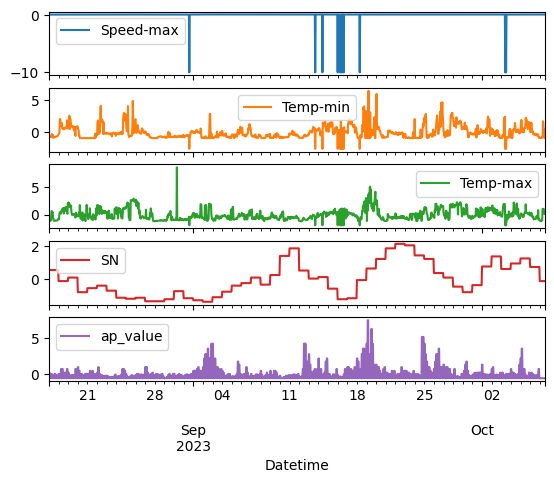

In [ ]:
xnew_scaled_df.set_index('Datetime')[['Speed-max', 'Temp-min', 'Temp-max', 'SN', 'ap_value']].plot(subplots=True)

In [ ]:
xx=xnew_scaled_df[['Speed-max', 'Temp-min', 'Temp-max', 'SN', 'ap_value']]
TimeseriesGenerator(xx,y,length=2,batch_size=1)[0]

(array([[[ 0.08548324, -0.77099926, -1.12191466,  0.55454922,
           0.13503145],
         [ 0.0856255 , -0.80071531, -1.14066477,  0.55454922,
           0.13503145]]]),
 array([1.]))

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(xx,y,random_state=0,shuffle=False)

In [ ]:

win_length =
train_generator = TimeseriesGenerator(xtrain,ytrain,length=win_length,batch_size=32)
test_generator = TimeseriesGenerator(xtest,ytest, length=win_length,batch_size=32)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [ ]:
model=Sequential()
model.add(LSTM(32, input_shape=(win_length,4),activation='tanh',return_sequences=True))
model.add(LSTM(512, activation='tanh',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(1024, activation='tanh',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(1024, activation='tanh',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh',return_sequences=False))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 32)           4736      
                                                                 
 lstm_1 (LSTM)               (None, 100, 512)          1116160   
                                                                 
 dropout (Dropout)           (None, 100, 512)          0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 1024)         6295552   
                                                                 
 dropout_1 (Dropout)         (None, 100, 1024)         0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 1024)         8392704   
                                                                 
 dropout_2 (Dropout)         (None, 100, 1024)         0

In [ ]:
import keras
model.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(),metrics=[keras.metrics.MeanAbsoluteError()])
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,mode='min',verbose=1)